## Классификация картинок

In [12]:
import pandas as pd
from sklearn.datasets import load_digits

In [13]:
digits = load_digits()

In [14]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [15]:
# описание данных
for line in digits['DESCR'].split('\n'):
    print(line)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [16]:
# признаки

X = pd.DataFrame( digits['data'] )
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [17]:
# целевая переменная - цифра от 0 до 9

Y = pd.Series( digits['target'] )
Y.head()

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.3, random_state = 0 )

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# зададим пока одно значение параметра модели max_depth
depth = 5

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score( DecisionTreeClassifier( max_depth = depth ), X, Y, cv = 5, scoring = 'accuracy' )

array([0.63888889, 0.49722222, 0.67966574, 0.7270195 , 0.63231198])

### Задание слушателям

1. Построить модель для 20 значений max_depth 
2. Для каждого значения глубины реализовать cross_val_score 
3. Получить среднее значение метрики

In [40]:
import numpy as np
means = []
stds = []
for i in range(1, 20):
    print(i)
    md = cross_val_score( DecisionTreeClassifier( max_depth = i ), X, Y, cv = 5, scoring = 'accuracy' )
    means.append(md.mean())
    stds.append(md.std())

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [ ]:
max(enumerate(means))

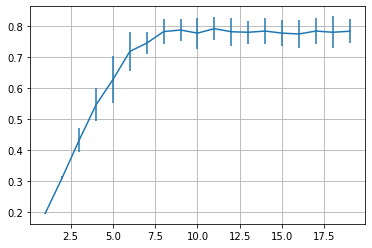

In [44]:
import matplotlib.pyplot as plt
plt.errorbar(range(1, 20), means, stds)
plt.grid()

### Можно то же самое с помощью grid search

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = [ {'max_depth': list( range(1, 20) )} ]

In [26]:
gs = GridSearchCV( DecisionTreeClassifier(), param_grid = params, scoring = 'accuracy', return_train_score = False )

In [27]:
gs.fit( X, Y )

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19]}],
             scoring='accuracy')

In [28]:
gs.cv_results_

{'mean_fit_time': array([0.01267715, 0.01496425, 0.0185503 , 0.02298131, 0.02732487,
        0.03111372, 0.03398223, 0.03880582, 0.0397367 , 0.04123836,
        0.04159212, 0.04117603, 0.04328222, 0.04122033, 0.04228911,
        0.04168601, 0.04168916, 0.04148917, 0.04058976]),
 'std_fit_time': array([0.00278016, 0.00062082, 0.00079788, 0.00070086, 0.00048906,
        0.00074709, 0.00150676, 0.00313208, 0.00178066, 0.00194189,
        0.00139573, 0.00196243, 0.00411896, 0.0014465 , 0.0024108 ,
        0.0015954 , 0.00132313, 0.00119621, 0.00166568]),
 'mean_score_time': array([0.00498776, 0.00509615, 0.00478783, 0.00498734, 0.00459018,
        0.00439072, 0.00518699, 0.00478969, 0.00495114, 0.00479183,
        0.00408478, 0.00441499, 0.00439029, 0.00438704, 0.00438752,
        0.00482025, 0.00418801, 0.00458574, 0.00467515]),
 'std_score_time': array([6.31508151e-04, 2.15697561e-04, 3.96805066e-04, 1.86271906e-06,
        4.90002736e-04, 4.88621158e-04, 9.74085293e-04, 3.99641219e-04,


In [29]:
gs.best_params_

{'max_depth': 16}